In [3]:
%matplotlib inline
import pandas as pd
from SCB import SCB
import geopandas as gpd

In [4]:
scb = SCB('http://api.scb.se/OV0104/v1/doris/sv/ssd/BE/BE0101/BE0101H/FoddaK')

In [5]:
boros = gpd.GeoDataFrame.from_file('Kommuner_SCB/kommuner.shp')

In [13]:
boros['AREA'] = boros['AREA'] * 3

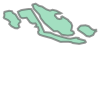

In [18]:
boros.loc[5].geometry

In [19]:
p1 = gpd.Polygon([(0, 0), (1, 0), (1, 1)])

AttributeError: 'module' object has no attribute 'Polygon'

In [3]:
scb.filter(code='Region', kind='item', values=['00'])
scb.filter(code='Tid', kind='all', values=['*'])

<SCB instance: http://api.scb.se/OV0104/v1/doris/sv/ssd/BE/BE0101/BE0101H/FoddaK>

In [13]:
df = scb.get()

In [14]:
df

,region,Levande födda 1968,Levande födda 1969,Levande födda 1970,Levande födda 1971,Levande födda 1972,Levande födda 1973,Levande födda 1974,Levande födda 1975,Levande födda 1976,...,Levande födda 2005,Levande födda 2006,Levande födda 2007,Levande födda 2008,Levande födda 2009,Levande födda 2010,Levande födda 2011,Levande födda 2012,Levande födda 2013,Levande födda 2014
0,00 Riket,113086,107621,110149,114485,112273,109663,109874,103631,98345,...,101346,105913,107421,109301,111801,115641,111770,113177,113593,114907


In [5]:
scb2 = SCB('http://api.scb.se/OV0104/v1/doris/sv/ssd/OE/OE0101/Kommunalskatter2000')

In [6]:
scb2.filter(code='Region', kind='item', values=['00'])
scb2.filter(code='Tid', kind='all', values=['*'])
scb2.filter(code='ContentsCode', kind='item', values=['OE0101D1'])

<SCB instance: http://api.scb.se/OV0104/v1/doris/sv/ssd/OE/OE0101/Kommunalskatter2000>

In [7]:
df2 = scb2.get()

In [8]:
df2

,region,"Skattesats, total kommunal 2000","Skattesats, total kommunal 2001","Skattesats, total kommunal 2002","Skattesats, total kommunal 2003","Skattesats, total kommunal 2004","Skattesats, total kommunal 2005","Skattesats, total kommunal 2006","Skattesats, total kommunal 2007","Skattesats, total kommunal 2008","Skattesats, total kommunal 2009","Skattesats, total kommunal 2010","Skattesats, total kommunal 2011","Skattesats, total kommunal 2012","Skattesats, total kommunal 2013","Skattesats, total kommunal 2014","Skattesats, total kommunal 2015"
0,00 Riket,30.38,30.53,30.52,31.17,31.51,31.6,31.6,31.55,31.44,31.52,31.56,31.55,31.6,31.73,31.86,31.99


In [9]:
df.set_index('region', inplace=True)
df2.set_index('region', inplace=True)

In [99]:
df2.columns = [x[-4:] for x in df2.columns]

In [102]:
df2 = df2.T

In [108]:
df2.rename(columns={'00 Riket': 'skattesats'}, inplace=True)

In [12]:
df

,Levande födda 1968,Levande födda 1969,Levande födda 1970,Levande födda 1971,Levande födda 1972,Levande födda 1973,Levande födda 1974,Levande födda 1975,Levande födda 1976,Levande födda 1977,...,Levande födda 2005,Levande födda 2006,Levande födda 2007,Levande födda 2008,Levande födda 2009,Levande födda 2010,Levande födda 2011,Levande födda 2012,Levande födda 2013,Levande födda 2014
region,,,,,,,,,,,,,,,,,,,,,
00 Riket,113086,107621,110149,114485,112273,109663,109874,103631,98345,96057,...,101346,105913,107421,109301,111801,115641,111770,113177,113593,114907
